<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [DTLZ1](#DTLZ1)
* [DTLZ2](#DTLZ2)
* [DTLZ3](#DTLZ3)
* [DTLZ4](#DTLZ4)
* [DTLZ5](#DTLZ5)
* [DTLZ6](#DTLZ6)
* [DTLZ7](#DTLZ7)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the DTLZ benchmark.
For these functions, an analytical form of the optimal Pareto front [is known](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/).

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials. At each trial the optimizer will stop until a maximum number of iterations is reached or if the target volume (based on the [known maximum hypervolume](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/) for various population sizes) is surpassed.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, runtime_summary, volume_summary

In [2]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 5

# Number of parents
N_PARENTS = 20

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 84574962

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# Truncate the maximum known hypervolume value to this number of decimal digits
VOLUMES_N_DIGITS = 4

# Reference point used for the known maximum hypervolume values
REFERENCE = np.array([11., 11.])

# 2) Other global values

# We store target hypervolumes for each function in the benchmark.

VOLUMES = {}
VOLUMES["dtlz1"] = {2: 120.750000, 3: 120.812500, 4: 120.833333, 5: 120.843750, 10: 120.861111,
                  20: 120.868421, 50: 120.872449, 100: 120.873737, 1000: 120.874875}
VOLUMES["dtlz2"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210644, 1000: 120.214114}
VOLUMES["dtlz3"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210643, 1000: 120.214114}
VOLUMES["dtlz4"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210634, 1000: 120.214114}
VOLUMES["dtlz7"] = {2: 112.534293, 3: 114.676857, 4: 115.495800, 5: 115.748424, 10: 115.964708, 
                   20: 116.045710, 50: 116.089454, 100: 116.101551, 1000: 116.111529}
# Helper functions
def truncate(value, n_digits=VOLUMES_N_DIGITS):
    tmp = 10 ** n_digits
    value = math.trunc(value * tmp)
    return value / tmp

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls, key):
    target_volume = None
    reference = None
    if key in VOLUMES:
        target_volume = truncate(VOLUMES[key][N_PARENTS])
        reference = REFERENCE

    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                max_evaluations=MAX_EVALUATIONS,
                target_indicator_value=target_volume,
                reference=reference,
            )

PARAMETERS = {}
PARAMETERS["dtlz1"] = get_base_params(benchmark.DTLZ1, "dtlz1")
PARAMETERS["dtlz2"] = get_base_params(benchmark.DTLZ2, "dtlz2")
PARAMETERS["dtlz3"] = get_base_params(benchmark.DTLZ3, "dtlz3")
PARAMETERS["dtlz4"] = get_base_params(benchmark.DTLZ4, "dtlz4")
PARAMETERS["dtlz5"] = get_base_params(benchmark.DTLZ5, "dtlz5")
PARAMETERS["dtlz6"] = get_base_params(benchmark.DTLZ5, "dtlz6")
PARAMETERS["dtlz7"] = get_base_params(benchmark.DTLZ7, "dtlz7")

def run(key, **parameter_replacements):
    params = dataclasses.replace(PARAMETERS[key], **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## DTLZ1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 24.78s, ask = 19.73s, tell = 2.67s, eval = 2.39s
HV with reference point ([11. 11.]) and target value (1.208684E+02):
 max. = 7.674612E+01, median = -2.382832E+01, min. = -9.036910E+01


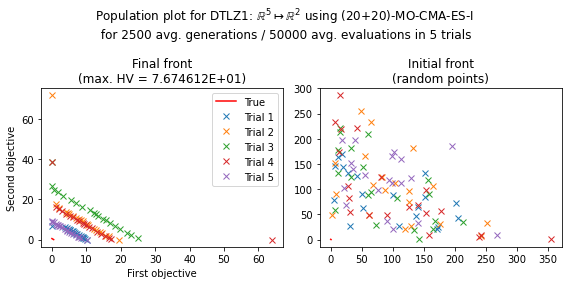

In [3]:
fig = run("dtlz1", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 22.05s, ask = 17.42s, tell = 2.52s, eval = 2.12s
HV with reference point ([11. 11.]) and target value (1.208684E+02):
 max. = 8.352007E+01, median = 5.072946E+01, min. = -1.057244E+02


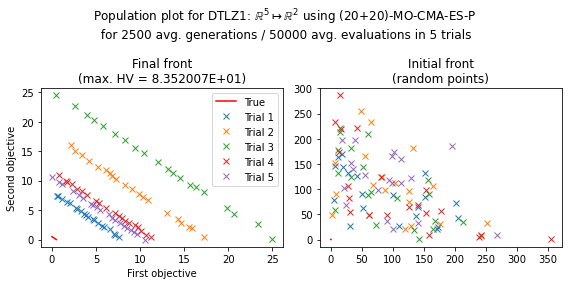

In [4]:
fig = run("dtlz1")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 72.71s, ask = 35.07s, tell = 22.35s, eval = 15.28s
HV with reference point ([11. 11.]) and target value (1.208684E+02):
 max. = 8.731003E+01, median = 1.519887E+01, min. = -7.735974E+00


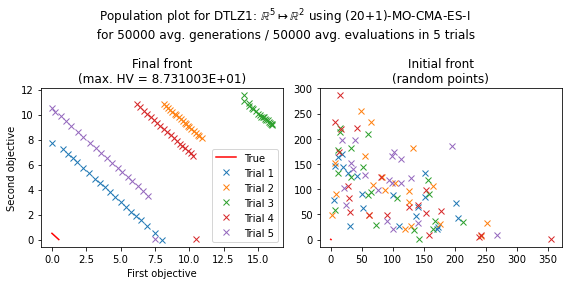

In [5]:
fig = run("dtlz1", success_notion="individual", n_offspring=1)

### Steady-state, population-based

We observe that the steady-state using the population-based notion of success achieves better distribution than the other 3 variants.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 69.72s, ask = 34.07s, tell = 20.92s, eval = 14.74s
HV with reference point ([11. 11.]) and target value (1.208684E+02):
 max. = 8.734776E+01, median = 6.303070E+01, min. = 0.000000E+00


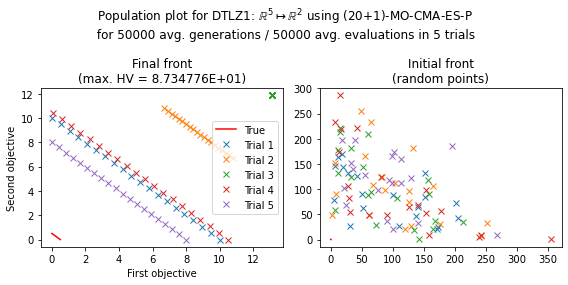

In [6]:
fig = run("dtlz1", n_offspring=1)

## DTLZ2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 28.56s, ask = 20.18s, tell = 2.53s, eval = 5.85s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201904E+02, median = 1.201887E+02, min. = 1.201863E+02


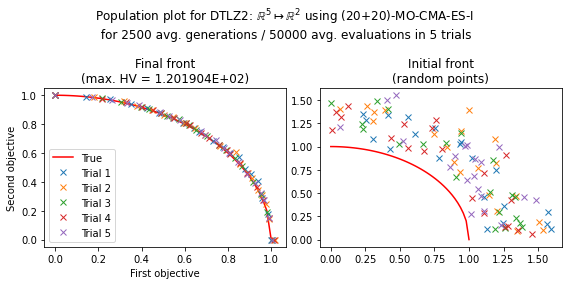

In [7]:
fig = run("dtlz2", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 31.72s, ask = 22.25s, tell = 3.07s, eval = 6.40s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201891E+02, median = 1.201857E+02, min. = 1.201849E+02


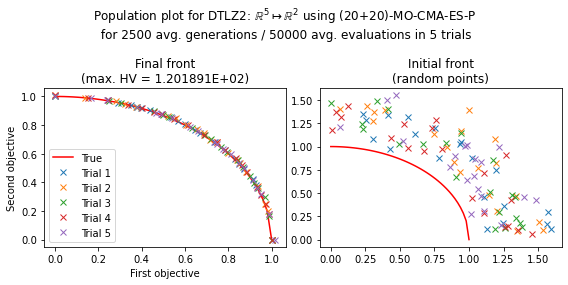

In [8]:
fig = run("dtlz2")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 51.26s, ask = 25.54s, tell = 16.23s, eval = 9.49s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201952E+02, median = 1.201951E+02, min. = 1.201946E+02


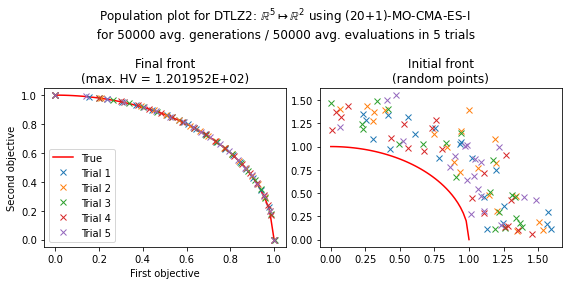

In [9]:
fig = run("dtlz2", success_notion="individual", n_offspring=1)

### Steady-state, population-based

We observe that the steady-state using the population-based notion of success reaches the target volume faster than the other 3 variants and achieves better distribution.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.42s, ask = 3.20s, tell = 2.04s, eval = 1.18s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201968E+02, median = 1.201968E+02, min. = 1.201968E+02


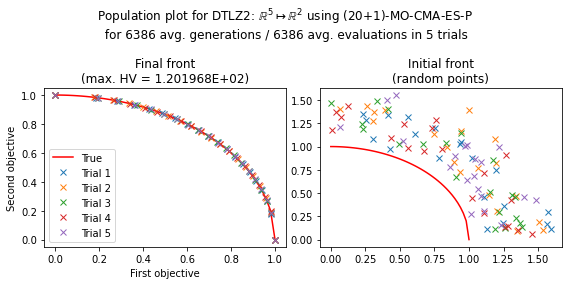

In [10]:
fig = run("dtlz2", n_offspring=1)

## DTLZ3
[Back to top](#top)

### Individual-based

Note: we get negative HV values because we are using $(-11, -11)$ as the reference point and the obtained fronts are outside the bounding box it defines.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 28.41s, ask = 19.32s, tell = 2.70s, eval = 6.39s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = -8.600172E+01, median = -2.181997E+02, min. = -2.910081E+02


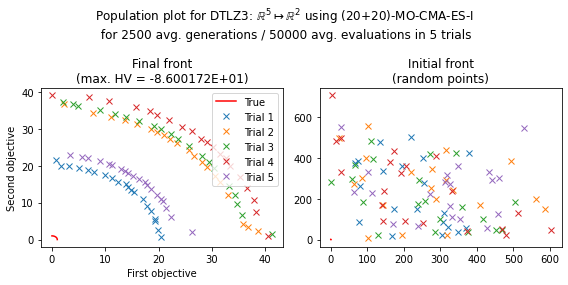

In [11]:
fig = run("dtlz3", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 31.26s, ask = 21.31s, tell = 2.99s, eval = 6.95s


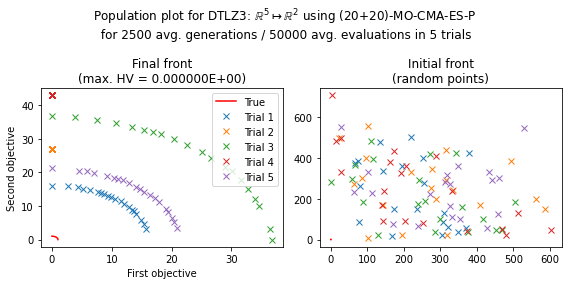

In [12]:
fig = run("dtlz3", target_indicator_value=None)

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 71.32s, ask = 35.05s, tell = 22.31s, eval = 13.95s
No reference point was provided.


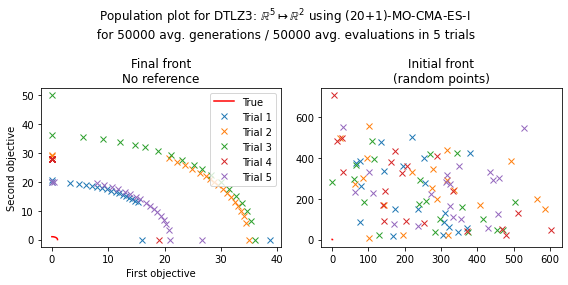

In [13]:
fig = run("dtlz3", success_notion="individual", n_offspring=1, reference=None, target_indicator_value=None)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 75.10s, ask = 37.41s, tell = 22.92s, eval = 14.78s
No reference point was provided.


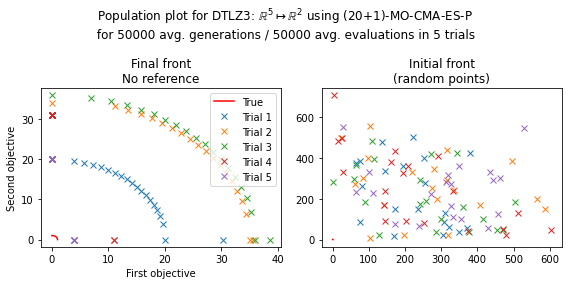

In [14]:
fig = run("dtlz3", n_offspring=1, reference=None, target_indicator_value=None)

## DTLZ4
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 32.40s, ask = 22.51s, tell = 2.76s, eval = 7.13s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201903E+02, median = 1.201885E+02, min. = 1.201866E+02


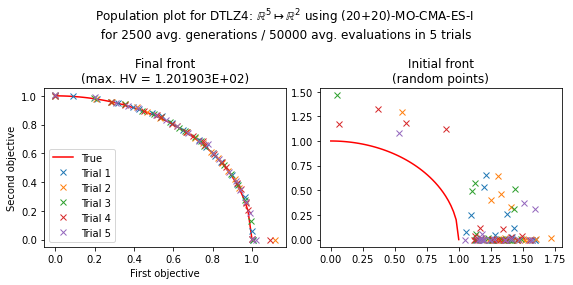

In [15]:
fig = run("dtlz4", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 29.52s, ask = 20.25s, tell = 2.93s, eval = 6.35s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201877E+02, median = 1.201845E+02, min. = 1.201835E+02


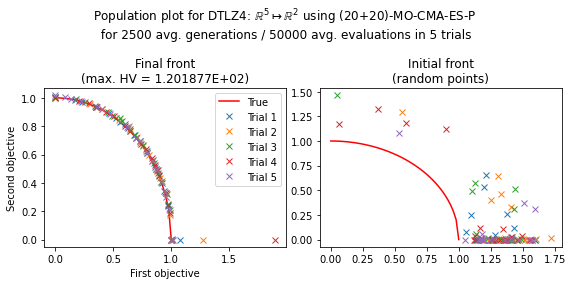

In [16]:
fig = run("dtlz4")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 63.83s, ask = 31.29s, tell = 20.23s, eval = 12.31s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201950E+02, median = 1.201936E+02, min. = 1.100000E+02


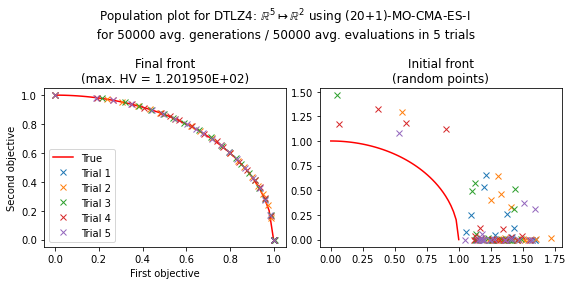

In [17]:
fig = run("dtlz4", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 10.47s, ask = 5.16s, tell = 3.29s, eval = 2.03s
HV with reference point ([11. 11.]) and target value (1.201968E+02):
 max. = 1.201968E+02, median = 1.201968E+02, min. = 1.201968E+02


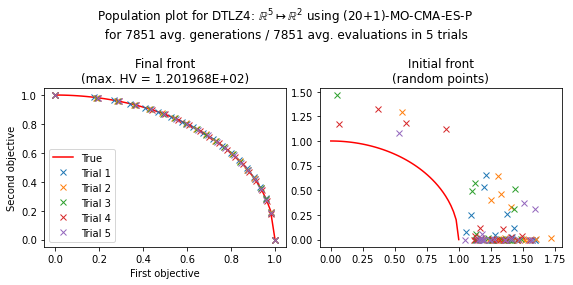

In [18]:
fig = run("dtlz4", n_offspring=1)

## DTLZ5
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 29.88s, ask = 19.59s, tell = 2.39s, eval = 7.90s
No reference point was provided.


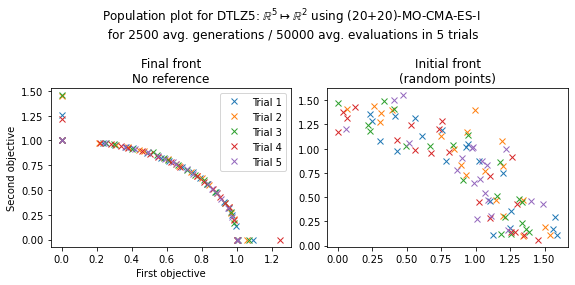

In [19]:
fig = run("dtlz5", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 35.98s, ask = 23.35s, tell = 3.28s, eval = 9.35s
No reference point was provided.


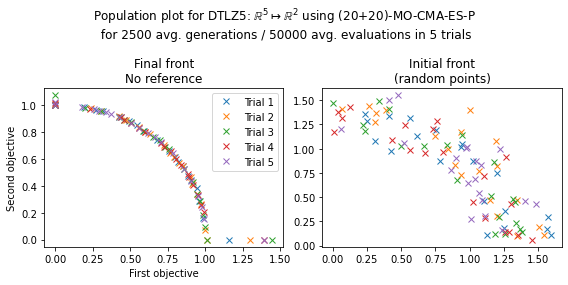

In [20]:
fig = run("dtlz5")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 61.64s, ask = 29.45s, tell = 18.78s, eval = 13.41s
No reference point was provided.


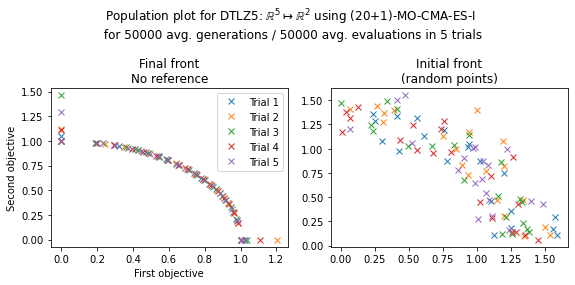

In [21]:
fig = run("dtlz5", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 66.22s, ask = 31.84s, tell = 19.93s, eval = 14.46s
No reference point was provided.


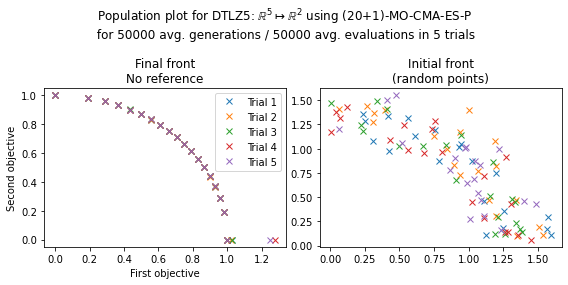

In [22]:
fig = run("dtlz5", n_offspring=1)

## DTLZ6
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 27.62s, ask = 18.04s, tell = 2.23s, eval = 7.35s
No reference point was provided.


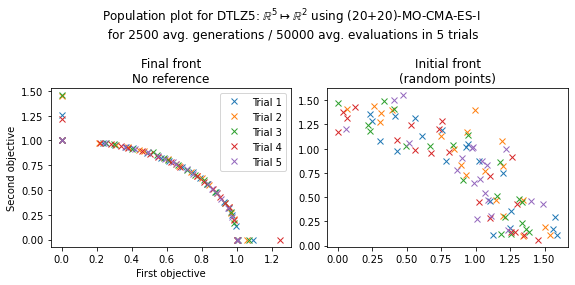

In [23]:
fig = run("dtlz6", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 18.12s, ask = 11.74s, tell = 1.69s, eval = 4.69s
No reference point was provided.


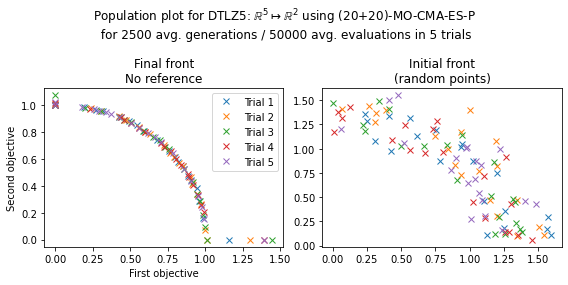

In [24]:
fig = run("dtlz6")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 48.46s, ask = 23.30s, tell = 14.74s, eval = 10.42s
No reference point was provided.


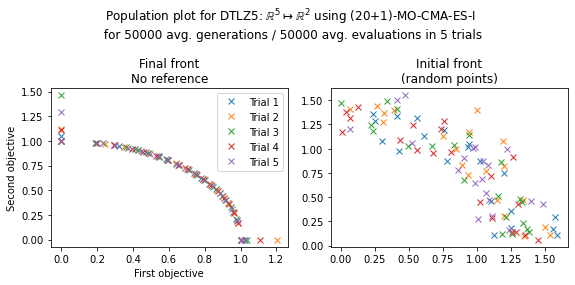

In [25]:
fig = run("dtlz6", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 38.07s, ask = 18.47s, tell = 11.26s, eval = 8.33s
No reference point was provided.


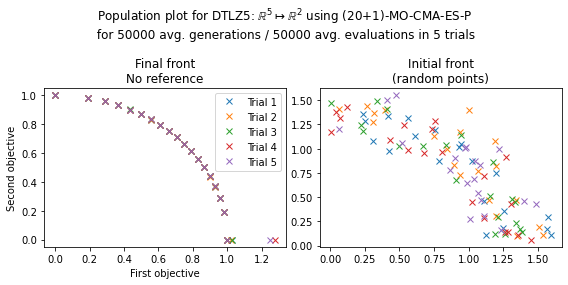

In [26]:
fig = run("dtlz6", n_offspring=1)

## DTLZ7
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 17.33s, ask = 11.71s, tell = 1.74s, eval = 3.88s
HV with reference point ([11. 11.]) and target value (1.160457E+02):
 max. = 9.463606E+01, median = 9.463443E+01, min. = 9.461747E+01


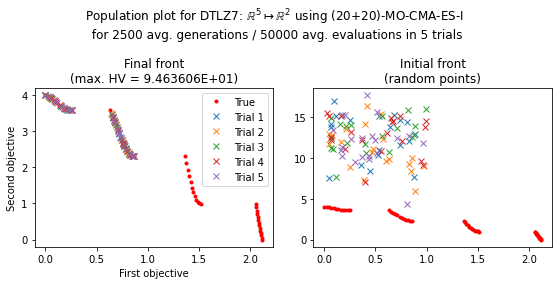

In [27]:
fig = run("dtlz7", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 20.62s, ask = 13.83s, tell = 2.14s, eval = 4.64s
HV with reference point ([11. 11.]) and target value (1.160457E+02):
 max. = 9.463537E+01, median = 9.463152E+01, min. = 9.461894E+01


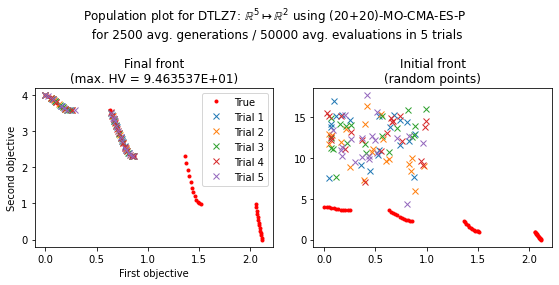

In [28]:
fig = run("dtlz7")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 53.32s, ask = 26.11s, tell = 16.50s, eval = 10.72s
HV with reference point ([11. 11.]) and target value (1.160457E+02):
 max. = 9.463951E+01, median = 9.463936E+01, min. = 9.463934E+01


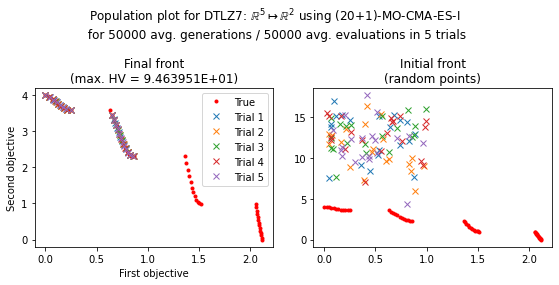

In [29]:
fig = run("dtlz7", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 48.90s, ask = 24.21s, tell = 14.76s, eval = 9.94s
HV with reference point ([11. 11.]) and target value (1.160457E+02):
 max. = 9.463952E+01, median = 9.463952E+01, min. = 9.463937E+01


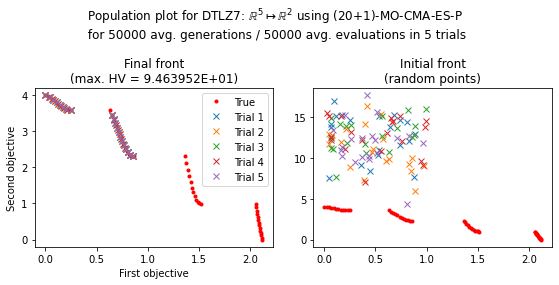

In [30]:
fig = run("dtlz7", n_offspring=1)

## References
[Back to top](#top)

[1] Deb, K., et al. Scalable multi-objective optimization test problems. In Proceedings of the 2002 Congress on Evolutionary Computation. CEC'02 (Cat. No. 02TH8600). IEEE, 2002. p. 825-830.